<h1><center>Inference: Socio-economic wellness of South Africa</center></h1>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

## **Intoduction**
We live in a beautiful diverse country. A country with beautiful people who get along and fight here and there, a country of great people who understand their differences to those they live with. A country where not everything is perfect but things could be better. In a country where people are either competing, getting by or barely surving day by day. We live in a very beautiful diverse country where people have different standards of living. Where standard of living is measured by what they have and what they are able to afford and what independant variables some are exposed to that others do not . In this Project we aim to identify major contributors to the standard of living of south africans through a survey that was done nationally with a sample of approximately quarter of a million instance of people, where an instance is a household of either an individual or a family.

#### **Research question**
What are the factors that are affecting the South Africans' standard of living?

#### **Hypothesis**
To answer the question we look at factors like the types of homes and facilities that people living in and ease of access to certain things and scarsity of certain things to different families and individuals. From there we then make in inference as to what is the dominating in the contribution to the standard of living in South Africa. Before we begin, we have a hypothesis, that mojority of South Africans are living a normal standard of life, there's way lesser rich people and and the there are those who are poor whose numbers are more than those that are rich and therefore things like location and availability of resources are major contributers to the standard of living.

#### **Methodology**
Steps we plan to take in achieving our goal
1. Read in data
2. Remove Data we do no need (e.g colums with the same value throughout or nulls where appropriate)
3. Do further cleanings if necessary
4. Exploratory Data analyses of cleaned data
5. Add to this list after the first 4 steps

## **Data Description**
This data is taken from `nesstar.statssa.gov.za`, under community surveys. This data was collected in the year 2007 through a survey.
It is worthy to mention that, like any other data, there might be data that is useless in terms of us answering the question at hand.
With that said, the data consists of `29 fields` in total and `246618 records` and not all fields will be used for the purposes of this project and that will be explained as to why certain data isn't being used.

**Contents of Data**

0. **SN: Serial Number**
    * This is a the serial number, this is a derived data which keeps is merely an index to of every record.
    * This field is irrelavant to us for the purposes of our project
    
    
1. **Scope_Status: Scope Status of the Survey**
    * This field is also a derived and had nothing to do with the survey itself other.
    * Every Single record shares the same the value and therefore we will not be using this field at all
    
    
2. **HO1_HU: Type of main dwelling**
    1. House of brick Structure -- value = 1 
    2. Traditional Dwelling .. 2
    3. Flat in block flats .. 3
    4. Town/cluster house .. 4
    5. House/room in backyard .. 5
    6. Informal dwelling/shack in backyard .. 6
    7. Informal dwelling NOT in backyard (squatter camp).. 7
    8. Room/flatlet NOT in backyard but on shared property ..8
    9. Caravan or Tent .. 9
    10. Private ship/boat .. 10
    11. Workers' hostel .. 11
    12. Other .. 12
    
    
3. **HO2_Rooms: Number of rooms**
    * values from 1 to 9 and 10+
    
    
4. **HO3_Water_Access : Access to water**
    0. Other -- value = 0
    1. Piped water inside the dwelling -- 1
    2. Piped water inside the yard -- 2
    3. Piped water from acces point outside the yard -- 3
    4. Borehole -- 4
    5. Spring -- 5
    6. Dam/pool -- 6
    7. River/stream -- 7
    8. Water vendor -- 8
    9. Rain water tank -- 9
    
    
5. **HO4_Serv_Prov: Does the water come from the Municipality?**
    * Yes -- 1 , NO -- 2 , Don't Know -- 3 , Unspecified -- 9
    * Above line shows the answers and the values on the datasets
    
    
6. **HO5_Water_Distance: Distance from water access point**
    1. Less than 200m -- 1
    2. Between 200m and 500m -- 2
    3. Between 500m and 1km -- 3
    4. More than 1k -- 4
    5. Unspecified -- 9
    
    
7. **HO6_Toilet_Facil: Toilet facilities**
    1. Flush Toilet Connected to sewerage system -- 1
    2. Flush toilet (with septic tank) -- 2
    3. Dry toilet facility -- 3
    4. Pit toilet with ventilation -- 4
    5. Pit toilet without ventilation -- 5
    6. Chemical toilet -- 6 
    7. Bucket toilet system -- 7
    8. None -- 8  
    
    
8. **H07_Cooking: Energy or Fuel used for cooking**
    1. Electricity -- 1
    2. Gas -- 2
    3. Paraffin -- 3
    4. Wood -- 4
    5. Coal -- 5 
    6. Animal dung -- 7
    7. Solar -- 8
    8. Other -- 9


9. **H08_Heating: Energy or fuel used for heating**
    1. Electricity -- 1
    2. Gas -- 2
    3. Paraffin -- 3
    4. Wood -- 4
    5. Coal -- 5 
    6. Animal dung -- 7
    7. Solar -- 8
    8. Other -- 9
    
10. **H09_Lighting: Energy or Fuel used for lighting**
    1. Electricity -- 1
    2. Gas -- 2
    3. Paraffin -- 3
    4. Candles -- 6
    5. Solar -- 8
    6. Other -- 9
    
    
11. **H10A_Fridge:Household goods: Refrigerator**
    1. Yes -- 1
    2. No --2
    
    
12. **H10B_Radio: Household goods: Radio**
    1. Yes -- 1
    2. No --2
    
    
13. **H10D_Computer: Household goods: Computer**
    1. Yes -- 1
    2. No --2
    
    
14. **H10C_Television: Household goods: Television**
    1. Yes -- 1
    2. No --2
    
    
15. **H10E_Telephone: Household goods: Telephone**
    1. Yes -- 1
    2. No --2
    3. Unspecified -- 9
    
    
16. **H10F_Internet:Household goods: Internet facilities**
    1. Yes -- 1
    2. No --2
    3. Unspecified -- 9
 
 
17. **H10G_Postfacil: Household goods: Post facilities**
    1. Yes -- 1
    2. No --2
    3. Unspecified -9
 
 
18. **H10H_Cell:Household goods: Cell phone**
    1. Yes -- 1
    2. No --2
    3. Unspecified -9
 
 
19. **H11_Tenure: Tenure Status**
    1. Owned and fully paid for -- 1
    2. Owned but not fully paid for --2
    3. Rented -- 3
    4. Occupied rent-free --4
    5. Other -- 5


20. **H12_Refuse: Refuse disposal**
    1. Removed by local authority atleast once a week -- 1
    2. Revomed by local authority less often -- 2
    3. Communal refuse dump -- 3 
    4. Own refuse dump -- 4
    5. No rubbish disposal
    6. Other


21. **HHIncome: Anual Househod income**
    1. No income -- 1
    2. R1-R4 800 -- 2
    3. R4 801-R9 600 -- 3
    4. R9 601-R19 200 -- 4
    5. R19 201-R38 400 -- 5
    6. R38 401-R76 800 -- 6
    7. R76 801-R153 600 -- 7
    8. R153 601-R307 200 -- 8
    9. R307 201-R614 400 -- 9
    10. R614 401-R1 228 800 -- 10
    11. R1 228 801-R2 457 600 -- 11
    12. R2 457 601 or more -- 12
    13. Response not given
    
    
22. **Weight**
    * this is a continuous variable or a floating point number


**REMAINING**
> The ramaing fields are:`Prv2001_Code` -> which province did responded live in 2001 `Prv2005_Code`-> which province did responded live in 2005 `DC2001_Code`-> which District did responded live in 2001  `DC2005_Code`-> which District did responded live in 2005 `Mun2001_Code`-> which municipality did responded live in 2001 and `Mun2005_Code`-> which munucipality did responded live in 2005

The data below has been downloaded on the date `April 9th 2021`

# we need to add `aspects of data quality` as well as `validation` and `ability to answer questions`

In [2]:
df = pd.read_csv('CS2007!housing_F1.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246618 entries, 0 to 246617
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SN                  246618 non-null  int64  
 1   Scope_Status        246618 non-null  int64  
 2   H01_Hu              246618 non-null  int64  
 3   H02_Rooms           246618 non-null  object 
 4   H03_Water_Access    246618 non-null  int64  
 5   H04_Serv_Prov       246618 non-null  int64  
 6   H05_Water_Distance  246618 non-null  int64  
 7   H06_Toilet_Facil    246618 non-null  int64  
 8   H07_Cooking         246618 non-null  int64  
 9   H08_Heating         246618 non-null  int64  
 10  H09_Lighting        246618 non-null  int64  
 11  H10A_Fridge         246618 non-null  int64  
 12  H10B_Radio          246618 non-null  int64  
 13  H10D_Computer       246618 non-null  int64  
 14  H10C_Television     246618 non-null  int64  
 15  H10E_Telephone      246618 non-nul

In [4]:
# Removing columns we don't need
df = df.drop(columns=['Scope_Status','SN'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246618 entries, 0 to 246617
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   H01_Hu              246618 non-null  int64  
 1   H02_Rooms           246618 non-null  object 
 2   H03_Water_Access    246618 non-null  int64  
 3   H04_Serv_Prov       246618 non-null  int64  
 4   H05_Water_Distance  246618 non-null  int64  
 5   H06_Toilet_Facil    246618 non-null  int64  
 6   H07_Cooking         246618 non-null  int64  
 7   H08_Heating         246618 non-null  int64  
 8   H09_Lighting        246618 non-null  int64  
 9   H10A_Fridge         246618 non-null  int64  
 10  H10B_Radio          246618 non-null  int64  
 11  H10D_Computer       246618 non-null  int64  
 12  H10C_Television     246618 non-null  int64  
 13  H10E_Telephone      246618 non-null  int64  
 14  H10F_Internet       246618 non-null  int64  
 15  H10G_Postfacil      246618 non-nul

In [6]:
def sum_interval(arr , start , end):
    sum = 0
    for i in range(start , end+1):
        sum+= arr[i]
    return sum

arr = [10 , 20 , 30 , 40 ,50]
start = 1
end = 3

print(sum_interval(arr , start, end))

90


In [7]:
df.Weight.max()

798.602507

## **Intoduction**
Standards of living are an important factor that determine the livelihood of an individual within a certain environment. Investigations relating to socio-economic factors often require numerous amounts of varying data. South Africa , amongst others, is a largely diverse countries in matters regarding race, economic productivity and livelihood.
In this investigation, we try to analyse large groups of information that can give a vivid picture to factors that both negatively and positively the direction of our economic status of our country. It goes without saying that research questions such as this, will help those with an intent to carefully consider the impact of national questions. i.e Is Jobless a direct result of people not having access to water.
Such questions have critical importantance in analysing the analytical background of things people go through in their daily lives.


# 5. Exploratory Analysis

> Choice of Initial Visualisations and Statistics (3)

> Appropriate Measures (2)

> Relevance to Questions (3)

> Consideration of Accuracy (2)

### Choice of Initial Visualisations and Statistics
<strong>Task:</strong> Here we visualised the data separately noting that household information contained specific data. Although the data may be encoded, A 1 in H02_Rooms and a 1 in H05_Water_Distance mean different things according to the manner in which they were encoded. Hence, plotting each of these household data on the same plot would not give us any inference on the distribution of data based on household information. We thought that visualising the data separately would atleast easily determine the frequency of household data, which gives insight into distribution for each separate variable. 


The below $x$ variables were encoded. Hence refer to "Contents of Data" that explains the x labels in accordance to their meaning


In [8]:
def hist_plot(nrows,ncols,columns,values,dict_cols,font_size=15):
    fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,40))
    for i in range(nrows):
        for j in range(ncols):
            dict_cols[columns[i*ncols + j]].plot(kind='bar',ax=ax[i,j])
            ax[i][j].set_title('{}'.format(columns[i*ncols + j]))
            ax[i][j].set_ylabel('Frequency')
            ax[i][j].set_xlabel('Category')
            ax[i][j].set_xticklabels(values[i*ncols + j].index.tolist(),fontsize=font_size)
    fig.tight_layout(pad=3.0)


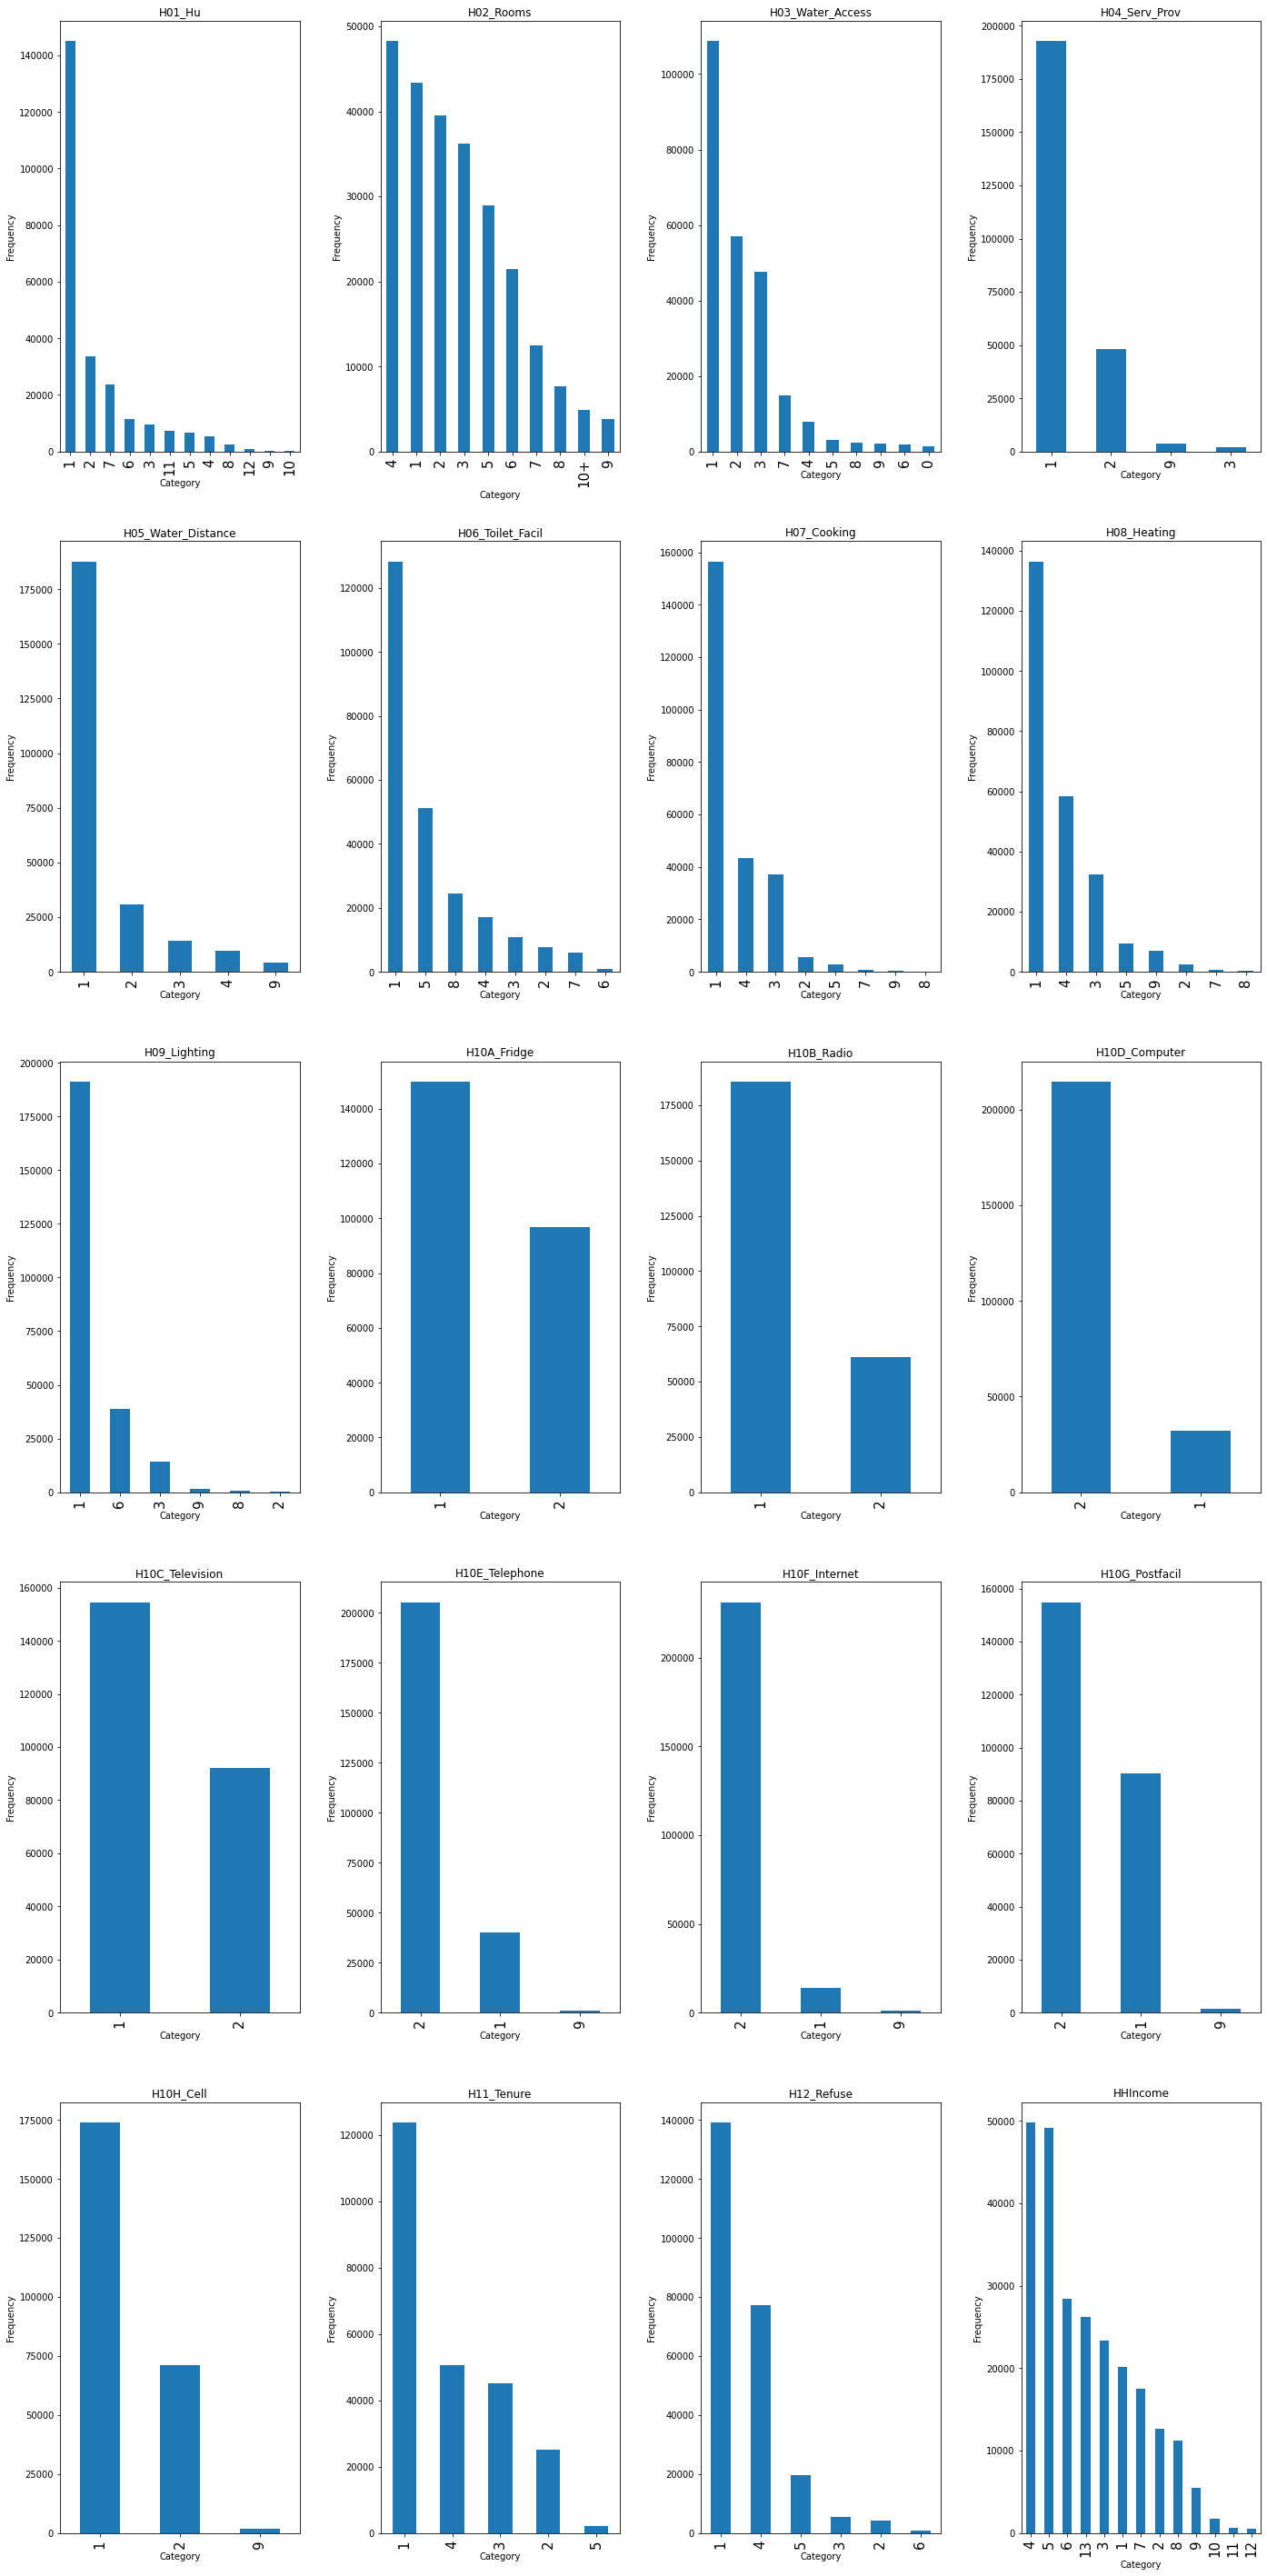

In [9]:

columns = [col for col in df.columns if col[0] == 'H']
values = [df[col].value_counts() for col in columns]
dict_cols = {col: df[col].value_counts() for col in columns}
hist_plot(5,4,columns,values,dict_cols)

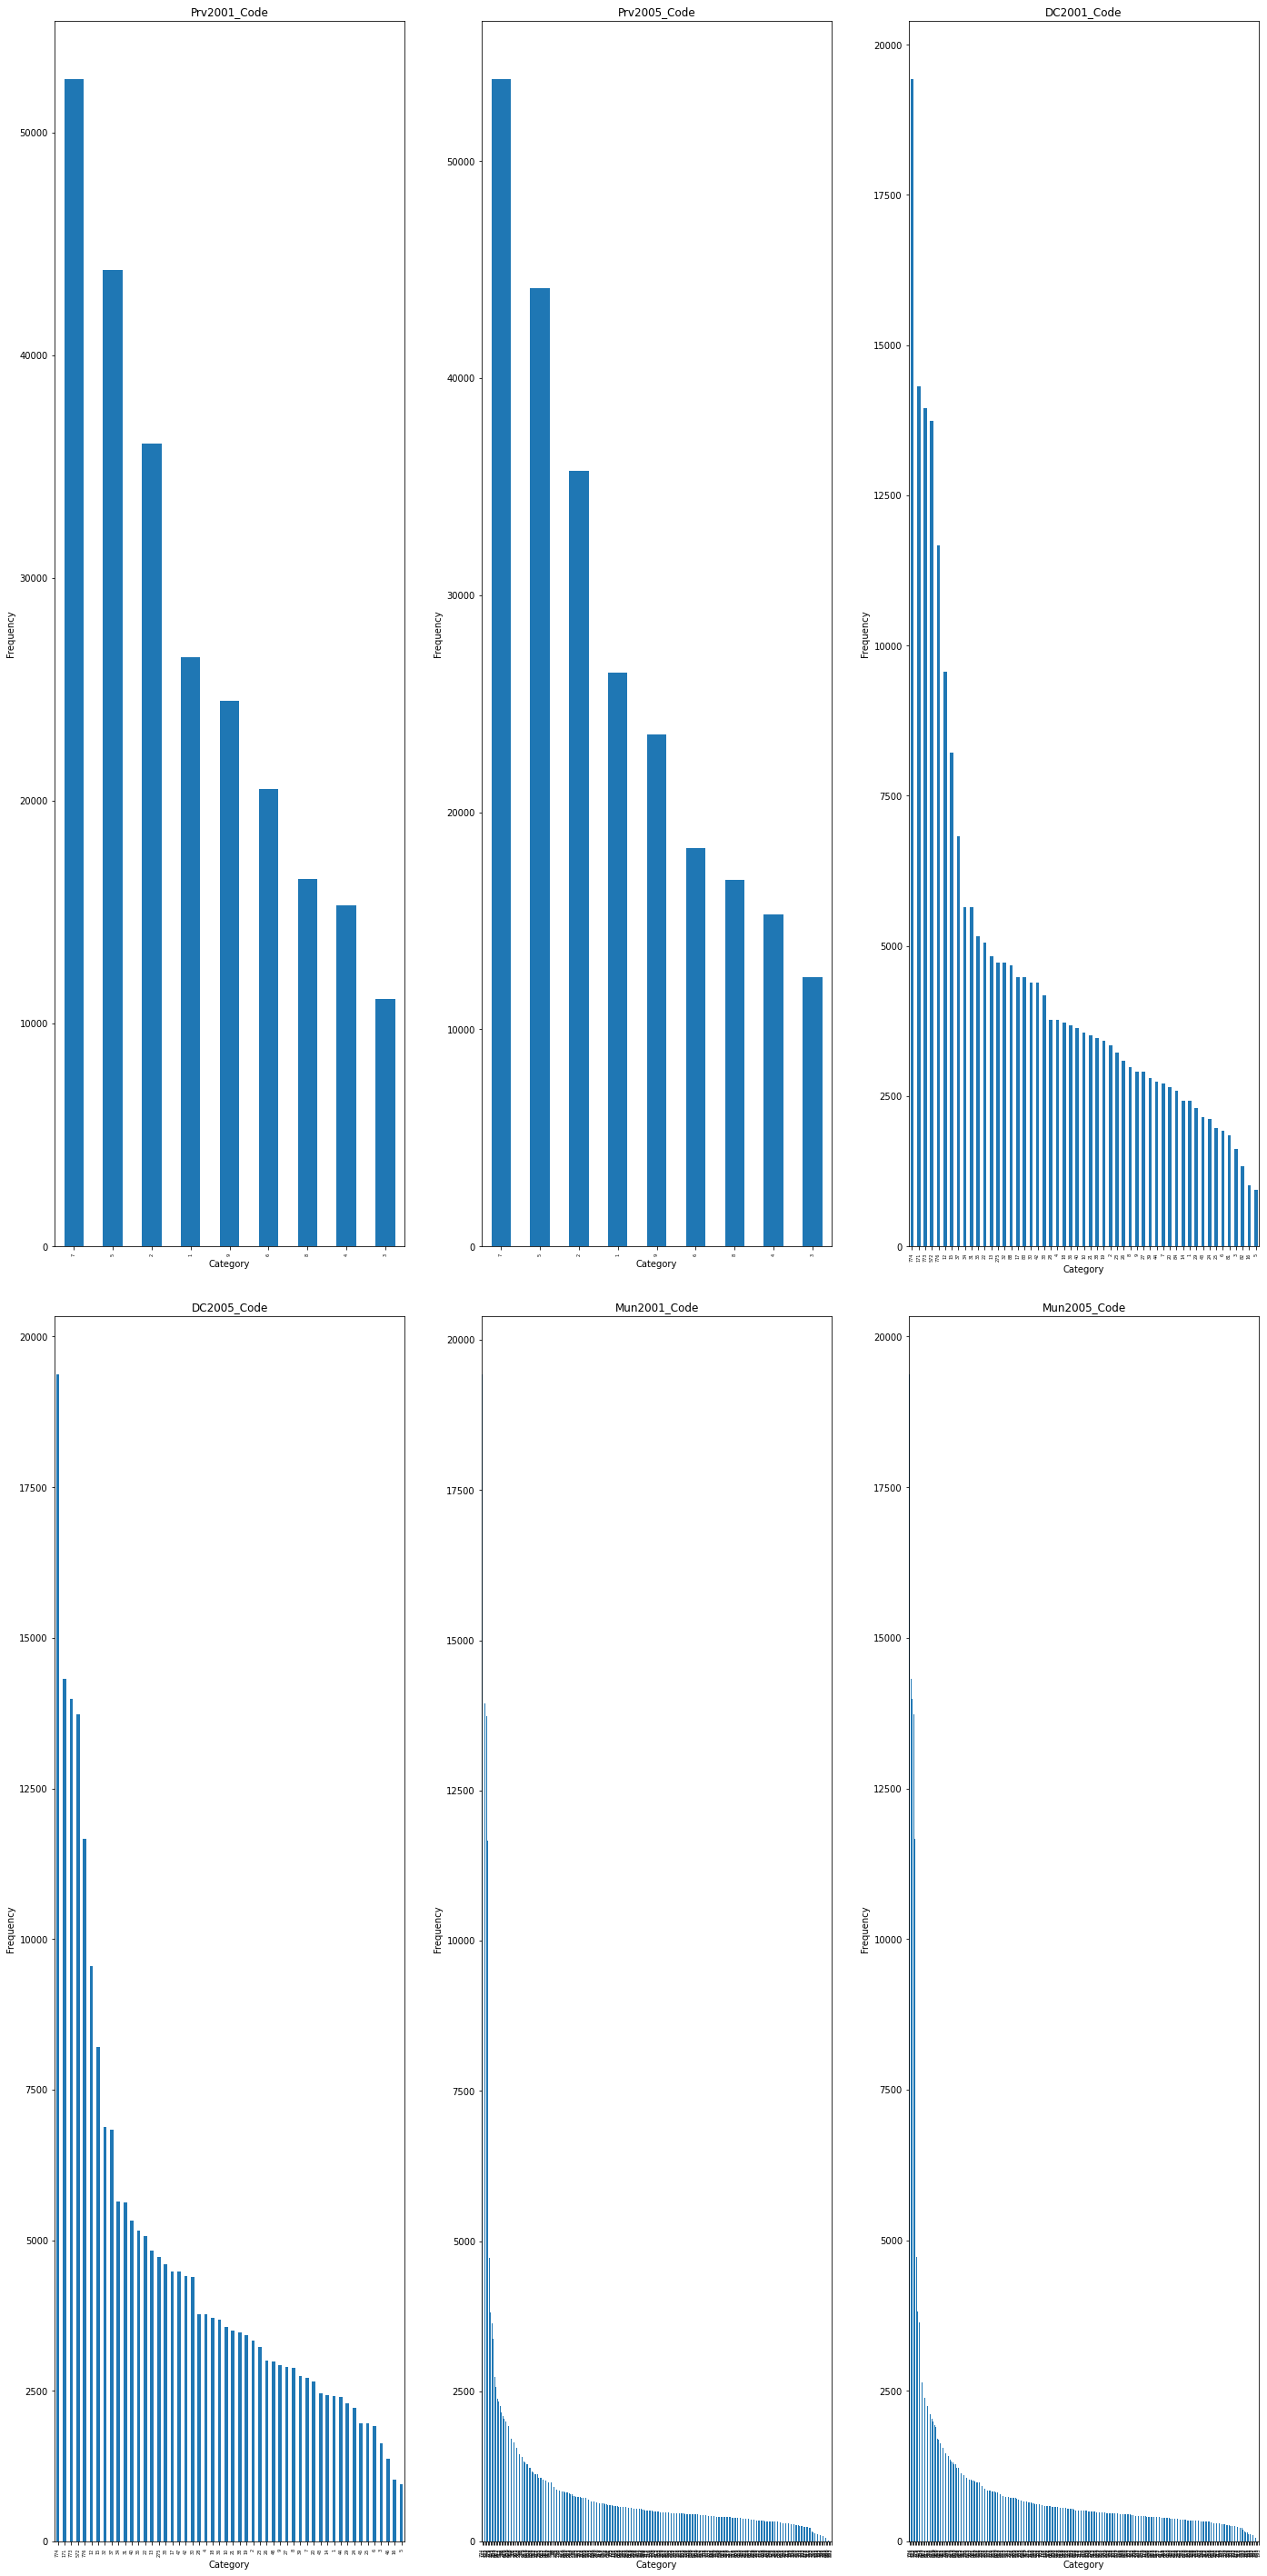

In [10]:
code_columns = [col for col in df.columns if 'Code' in col]
code_values = [df[col].value_counts() for col in code_columns]
code_dict_cols = {col: df[col].value_counts() for col in code_columns}
code_values
# # code_dict_cols
hist_plot(2,3,code_columns,code_values,code_dict_cols,5)

In [11]:
from scipy import stats

In [12]:
# np.corrcoef(df[columns[1]],df.Weight)
df[columns[1]] = df[columns[1]].str.replace("+",'')
df[columns[1]] = pd.to_numeric(df[columns[1]],errors='coerce')

In [13]:
# stats.pointbiserialr(df[columns[1]],df.Weight)
correlation_dict = {col:np.corrcoef(df[col],df.Weight) for col in columns}
correlation_dict

{'H01_Hu': array([[1.        , 0.00757032],
        [0.00757032, 1.        ]]),
 'H02_Rooms': array([[1.        , 0.07225215],
        [0.07225215, 1.        ]]),
 'H03_Water_Access': array([[ 1.        , -0.17402657],
        [-0.17402657,  1.        ]]),
 'H04_Serv_Prov': array([[ 1.        , -0.08163286],
        [-0.08163286,  1.        ]]),
 'H05_Water_Distance': array([[ 1.        , -0.04886579],
        [-0.04886579,  1.        ]]),
 'H06_Toilet_Facil': array([[ 1.       , -0.1632163],
        [-0.1632163,  1.       ]]),
 'H07_Cooking': array([[ 1.        , -0.16405379],
        [-0.16405379,  1.        ]]),
 'H08_Heating': array([[ 1.       , -0.1423036],
        [-0.1423036,  1.       ]]),
 'H09_Lighting': array([[ 1.        , -0.15701289],
        [-0.15701289,  1.        ]]),
 'H10A_Fridge': array([[ 1.        , -0.16373569],
        [-0.16373569,  1.        ]]),
 'H10B_Radio': array([[ 1.        , -0.07564927],
        [-0.07564927,  1.        ]]),
 'H10D_Computer': array([